<h3>MNIST Dataset</h3>

One of the most commonly used datasets for educational purposes is the MNIST dataset. You can download it from deep learning libraries such as keras and pytorch and it consists of 28x28 pixel greyscale images of handwritten digits. Each image has the corresponding label and it can be used to train and test neural network models for image classification.

In [1]:
import numpy as np
a = np.zeros((3,4))
b = np.zeros((3,4))

In [2]:
np.stack((a,b),2).shape

(3, 4, 2)

In [3]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

/Users/guillemguigoicorominas/opt/anaconda3/envs/workspace/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Here we will use PyTorch to build out deep learning models. The following cells are for you to get familiar with how pytorch tensors work.

*The following cells are just for you to execute and observe the result. Jump to the section* **Working with Fashion-MNIST** *for the explanation of the code.*

In [4]:
# pytorch and numpy work well together
some_numpy_array = np.array([1,2,3])
some_torch_tensor = torch.tensor(some_numpy_array)
some_numpy_array = some_torch_tensor.numpy()

In [5]:
some_numpy_array.dtype

dtype('int64')

In [6]:
some_torch_tensor.dtype

torch.int64

In [7]:
# define tensor of random numbers
input_data = torch.randn(1,1,16)
print(input_data)
print(input_data.shape)

tensor([[[-0.9556, -0.8745, -0.1729, -1.6754, -0.2514,  2.7289,  0.7543,
           1.6180, -0.2368,  1.0759,  1.7754,  2.0707, -0.0405,  0.2174,
          -0.2416,  1.5176]]])
torch.Size([1, 1, 16])


In [8]:
matrix_1 = torch.ones((4,4))
matrix_2 = torch.ones((4,4))

In [9]:
matrix_1

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [10]:
matrix_2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [11]:
torch.hstack((matrix_1, matrix_2)).shape

torch.Size([4, 8])

In [12]:
torch.vstack((matrix_1, matrix_2)).shape

torch.Size([8, 4])

In [13]:
torch.dstack((matrix_1, matrix_2)).shape

torch.Size([4, 4, 2])

In [14]:
torch.dstack((matrix_1, matrix_2)).ndim

3

In [15]:
# define linear layer
linear = nn.Linear(16, 8)
linear.state_dict()

OrderedDict([('weight',
              tensor([[-0.0641, -0.1193,  0.2128,  0.0967,  0.0949,  0.2236,  0.0975,  0.1366,
                       -0.1461,  0.0417, -0.1915, -0.0382,  0.2436,  0.0326,  0.1801,  0.1768],
                      [-0.0898,  0.1683,  0.1672,  0.2459,  0.0456,  0.0933, -0.0588, -0.0522,
                       -0.2043, -0.1723, -0.0819,  0.2251,  0.1659,  0.1871, -0.2073,  0.0096],
                      [ 0.2062,  0.1518, -0.2454, -0.0708,  0.2373, -0.2323, -0.0026, -0.1778,
                        0.2220, -0.0834, -0.0674,  0.0488,  0.1159, -0.2165, -0.2328, -0.2049],
                      [ 0.0134, -0.0971, -0.2213, -0.0780, -0.1399, -0.1320, -0.0127,  0.0945,
                       -0.0829, -0.1397, -0.0744, -0.1428,  0.0624, -0.0375, -0.0675, -0.0622],
                      [-0.1736,  0.1409, -0.1115,  0.2349,  0.0693, -0.1960,  0.2180, -0.0740,
                        0.0016,  0.2177,  0.0333,  0.0662,  0.0642, -0.1858, -0.1004,  0.0258],
                     

In [16]:
linear(input_data_1)

NameError: name 'input_data_1' is not defined

In [ ]:
torch.matmul(input_data_1, linear.state_dict()['weight'].T) + linear.state_dict()['bias']

In [ ]:
torch.sum(linear.state_dict()['weight'][0] * input_data) + 0.2358

In [ ]:
torch.matmul(input_data, linear.state_dict()['weight'].T) + linear.state_dict()['bias']

In [ ]:
output = linear(input_data)
print(output.shape)
print(output)

In [ ]:
input_data.shape

In [ ]:
output

In [ ]:
# obtain the same output using matrix multiplication (torch.matmul(t1, t2))
torch.matmul(input_data, linear.state_dict()['weight'].T) + linear.state_dict()['bias']

<h3>Working with Fashion-MNIST</h3>

MNIST is the "hello, world!" of datasets for image classification. Since it is arguably overused, today we will download the Fashion-MNIST dataset. As explained by the authors:

"Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

You can find the original repository [here](https://github.com/zalandoresearch/fashion-mnist)

In [17]:
def transform_labels(label):
    label_vector = torch.zeros(10)
    label_vector[label] = 1
    return label_vector

train_dataset = datasets.FashionMNIST('./fmnist_data', download=True, train=True, transform=transforms.Compose([
                                                transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                ]), target_transform=transform_labels)

test_dataset = datasets.FashionMNIST('./fmnist_data', download=True, train=False, transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ]), target_transform=transform_labels)

The first time you execute this code PyTorch will download the dataset and store it in the specified folder (./fmnist_data). You can load it afterwards at any time without having to download it again.

In [18]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fmnist_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
Target transform: <function transform_labels at 0x7fc1fd25f670>

In [19]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./fmnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
Target transform: <function transform_labels at 0x7fc1fd25f670>

Digital images consist of pixels that (typically) range from 0 to 255 in value, consisting of an 8-bit representation of color ($2^8=256$ values). Most digital images are RGB, which combine different values for Red, Green and Blue pixels between 0 and 255. You can imagine this as three images superimposed on top of eachother that combined make the colors of the visible spectrum. These are called *channels*, and a typical RGB image has 3. The images in the current dataset have a single channel, as they are grayscale. The pixel values in the raw images range from 0 to 255, but here we already normalized the data with mean 0.1307 and standard deviation 0.3081 in the loading step. These are arbitrary values taken from PyTorch's own tutorial on how to work with the Fashion-MNIST dataset (https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

Each element in the train and test datasets is a tuple that contains both the image in tensor form and the label:

In [20]:
image, label = train_dataset[0]

In [21]:
image[0].shape

torch.Size([28, 28])

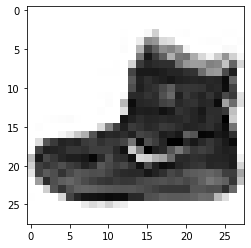

In [22]:
plt.imshow(image.numpy()[0], cmap='Greys')

In [23]:
print(type(image))
print(image.shape)
print(label)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


The size of [1, 28, 28] specifies that the image has a height and width of 28 pixels and a single channel.

In PyTorch's tutorial page we can find the following labels map, which tells us the classes that correspond to each numeric label:

In [24]:
image, label = train_dataset[1]

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [26]:
labels_map.get(torch.argmax(label).item())

'T-Shirt'

We can see that the first image in the training set is an Ankle Boot:

Text(0.5, 1.02, 'T-Shirt')

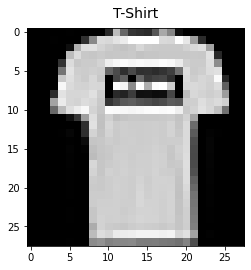

In [27]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(labels_map.get(torch.argmax(label).item()), fontsize=14, y=1.02)

In [28]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [29]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

The shape of the data in the train and test datasets tells us that there are 60.000 images in the train set and 10.000 images in the test set.

We will use PyTorch's DataLoader to iterate over the samples in the training and test sets. Here is where we will select the batch size, i.e. the number of samples that we will use as input to the model at once. The batch size is 

In [30]:
batch_size = 512

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Now it is time to define our model. 

In [31]:
dropout = nn.Dropout(0.6)
random_tensor = torch.randn(1,1,10)
print(random_tensor)
print(F.relu(random_tensor))


tensor([[[-0.6899,  0.4674, -0.8456, -1.5089, -1.7153,  0.3057, -0.3905,
           1.1778,  1.4188, -0.0906]]])
tensor([[[0.0000, 0.4674, 0.0000, 0.0000, 0.0000, 0.3057, 0.0000, 1.1778,
          1.4188, 0.0000]]])


In [32]:
class FullyConnected(nn.Module):
    def __init__(self, use_dropout: bool = True) -> None:
        super(FullyConnected, self).__init__()
        self.linear_1 = nn.Linear(784, 64)
        self.linear_2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 10)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(0.25)
        self.use_dropout = use_dropout

    def forward(self, x):
        x = F.relu(self.linear_1(x))
        if self.use_dropout:
            x = self.dropout(x)
        x = F.relu(self.linear_2(x))
        x = self.softmax(self.output(x))
        return x

In [33]:
# here we specify that we want to use the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FullyConnected().to(device)

In [34]:
# define optimizer
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-4)
loss_function = nn.CrossEntropyLoss()

Finally, we move onto the training loop:

In [37]:
from copy import deepcopy

epochs = 10
train_loss, test_loss = [], []
train_accuracy, test_accuracy = [], []
best_model = deepcopy(model)
best_test_loss = torch.inf

for epoch in range(epochs):
    correct = 0
    total = 0
    loss_epoch_train, loss_epoch_test = 0, 0
    for i, (img, labels) in enumerate(train_loader):
        input_data = img.to(device).reshape(-1,784)
        labels = labels.to(device)
        # Make predictions for this batch
        outputs = model(input_data)
        # Compute the loss and its gradients
        loss = loss_function(outputs, labels)
        loss.backward()
        # Adjust learning weights
        optimizer.step()
        optimizer.zero_grad()
        # Add loss values for this epoch
        loss_epoch_train += loss.item()
        for im, lab in zip(outputs, labels):
            if im.argmax() == lab.argmax():
                correct += 1
            total += 1
    accuracy_train_epoch = correct / total
    correct = 0
    total = 0
    for j, (img, labels) in enumerate(test_loader):
        input_data = img.to(device).reshape(-1,784)
        labels = labels.to(device)
        outputs = model(input_data)
        loss = loss_function(outputs, labels)
        loss_epoch_test += loss.item()
        for im, lab in zip(outputs, labels):
            if im.argmax() == lab.argmax():
                correct += 1
            total += 1
        accuracy_test_epoch = correct / total
        if loss_epoch_test < best_test_loss:
            best_test_loss = loss_epoch_test
            best_model = deepcopy(model)
    print(f'epoch: {epoch + 1}, training loss: {loss_epoch_train / (i+1)}, test loss: {loss_epoch_test / (j+1)}')
    print(f'epoch: {epoch + 1}, training accuracy: {accuracy_train_epoch}, test accuracy: {accuracy_test_epoch} \n')

epoch: 1, training loss: 0.7443296682026427, test loss: 0.5129877403378487
epoch: 1, training accuracy: 0.7581333333333333, test accuracy: 0.8161 

epoch: 2, training loss: 0.4457270828849178, test loss: 0.44353802800178527
epoch: 2, training accuracy: 0.8440833333333333, test accuracy: 0.8428 

epoch: 3, training loss: 0.3995730922383777, test loss: 0.42952619194984437
epoch: 3, training accuracy: 0.8585333333333334, test accuracy: 0.8454 

epoch: 4, training loss: 0.37231819306389763, test loss: 0.40394589900970457
epoch: 4, training accuracy: 0.8681666666666666, test accuracy: 0.8559 

epoch: 5, training loss: 0.35277937630475575, test loss: 0.39405733048915864
epoch: 5, training accuracy: 0.87405, test accuracy: 0.8569 

epoch: 6, training loss: 0.3394458192889973, test loss: 0.382901431620121
epoch: 6, training accuracy: 0.87805, test accuracy: 0.8636 

epoch: 7, training loss: 0.32897387040873705, test loss: 0.37257121652364733
epoch: 7, training accuracy: 0.8812, test accuracy: 

Text(0.5, 1.02, 'Coat')

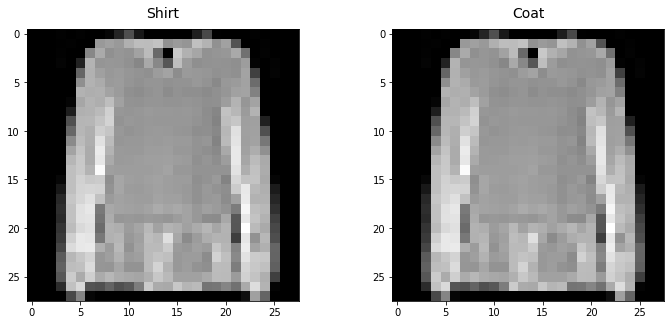

In [36]:
test_example = 18
image, label = train_dataset[test_example]

model.use_dropout = False

prediction = model(image.reshape(1,-1))

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].imshow(image.squeeze(), cmap='gray')
ax[1].imshow(image.squeeze(), cmap='gray')

ax[0].set_title(labels_map.get(torch.argmax(label).item()), fontsize=14, y=1.02)
ax[1].set_title(labels_map.get(torch.argmax(prediction).item()), fontsize=14, y=1.02)

<h3>Exercise</h3>
Repeat all the steps above using the original MNIST dataset. It is up to you to decide the architecture of the network and hyperparameters (learning rate, number of epochs and batch size). Can you get over 95% accuracy on the test set?

In [ ]:
def transform_labels(label):
    label_vector = torch.zeros(10)
    label_vector[label] = 1
    return label_vector

train_dataset = datasets.MNIST('./mnist_data', download=True, train=True, transform=transforms.Compose([
                                                transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                ]), target_transform=transform_labels)

test_dataset = datasets.MNIST('./mnist_data', download=True, train=False, transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ]), target_transform=transform_labels)